https://school.programmers.co.kr/learn/courses/30/lessons/60061

프로그램은 2차원 가상 벽면에 기둥과 보를 이용한 구조물 설치할 수 있는데, 기둥과 보는 길이가 1인 선분으로 표현되며 다음과 같은 규칙을 가지고 있습니다.
- 기둥은 바닥 위에 있거나 보의 한쪽 끝부분 위에 있거나, 또는 다른 기둥 위에 있어야 합니다.
- 보는 한쪽 끝부분이 기둥 위에 있거나, 또는 양쪽 끝부분이 다른 보와 동시에 연결되어 있어야 합니다.

단, 바닥은 벽면의 맨 아래 지면을 말합니다.

2차원 벽면은 n X n 크기 정사각 격자 형태이며, 각 격자는 1 X 1 크기입니다. 맨 처음 벽면은 비어있는 상태입니다. 기둥과 보는 격자 선의 교차점에 걸치지 않고, 격차 칸의 각 변에 정확히 일치하도록 설치할 수 있습니다. 다음은 기둥과 보를 설치해 구조물을 만든 예시입니다.
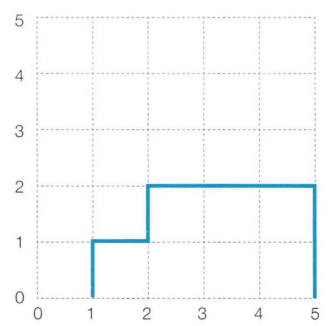

1. (1, 0)에서 위쪽으로 기둥 하나 설치 후, (1, 1)에서 오른쪽으로 보를 하나 만듭니다.
2. (2, 1)에서 위쪽으로 기둥 하나 설치 후, (2, 2)에서 오른쪽으로 보를 하나 만듭니다.
3. (5, 0)에서 위쪽으로 기둥 하나 설치 후, (5, 1)에서 위쪽으로 기둥 하나 더 설치합니다.
4. (4, 2)에서 오른쪽으로 보를 설치 후, (3, 2)에서 오른쪽으로 보를 설치합니다.

만약 (4, 2)에서 오른쪽으로 보를 먼저 설치하지 않고, (3, 2)에서 오른쪽으로 보를 설치하려고 한다면 2번 규칙에 맞지 않으므로 설치가 되지 않습니다. 기둥과 보를 삭제하는 기능도 있는데 기둥과 보를 삭제한 후에 남은 기둥과 보 또한 위 규칙을 만족해야 합니다. 만약 작업을 수행한 결과가 조건을 만족하지 않는다면 해당 작업은 무시됩니다.

벽면의 크기 n, 기둥과 보를 설치하거나 삭제하는 작업이 순서대로 담긴 2차원 배열 build_frame이 매개변수로 주어질 때, 모든 명령어를 수행한 후 구조물의 상태를 return 하도록 solution 함수 완성해주세요.

제한 사항 )
- n은 5 이상 100 이하인 자연수입니다.
- build_frame의 세로(행) 길이는 1 이상 1000 이하입니다.
- build_frame의 가로(열) 길이는 4입니다.
- build_frame의 원소는 [x, y, a, b] 형태입니다.
    * x, y는 기둥, 보를 설치 또는 삭제할 교차점의 좌표이며, [가로 좌표, 세로 좌표] 형태입니다.
    * a는 설치 또는 삭제할 구조물의 종류 (0 : 기둥, 1 : 보)
    * b는 구조물을 설치할 지 혹은 삭제할 지를 나타내며 0은 삭제, 1은 설치를 나타냅니다.
    * 벽면을 벗어나게 기둥, 보를 설치하는 경우는 없습니다.
    * 바닥에 보를 설치 하는 경우는 없습니다.
- 구조물은 교차점 좌표를 기준으로 보는 오른쪽, 기둥은 위쪽 방향으로 설치 또는 삭제합니다.
- 구조물이 겹치도록 설치하는 경우와 없는 구조물을 삭제하는 경우는 입력으로 주어지지 않습니다.
- 최종 구조물의 상태는 아래 규칙에 맞게 return 해주세요
    * return 하는 배열은 가로(열) 길이가 3인 2차원 배열로, 각 구조물의 좌표를 담고 있어야 합니다.
    * return 하는 배열의 원소는 [x, y, a] 형식입니다.
    * x, y는 기둥, 보의 교차점 좌표이며, [가로 좌표, 세로 좌표] 형태입니다.
    * 기둥, 보는 교차점 좌표를 기준으로 오른쪽, 또는 위쪽 방향으로 설치되어 있음을 나타냅니다.
    * a는 구조물의 종류 (0 : 기둥, 1: 보)
    * return 하는 배열은 x 좌표 기준으로 오름차순 정렬하며, x 좌표가 같을 경우 y좌표 기준으로 오름차순 정렬해주세요.
    * x, y좌표가 모두 같은 경우 기둥이 보보다 앞에 오면 됩니다.

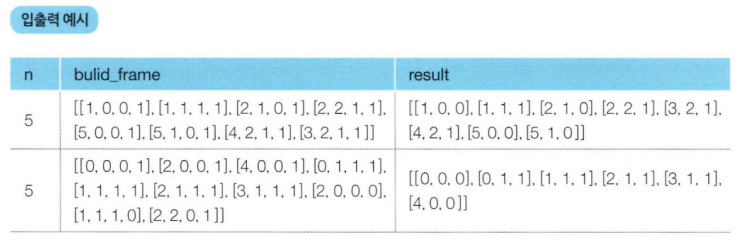

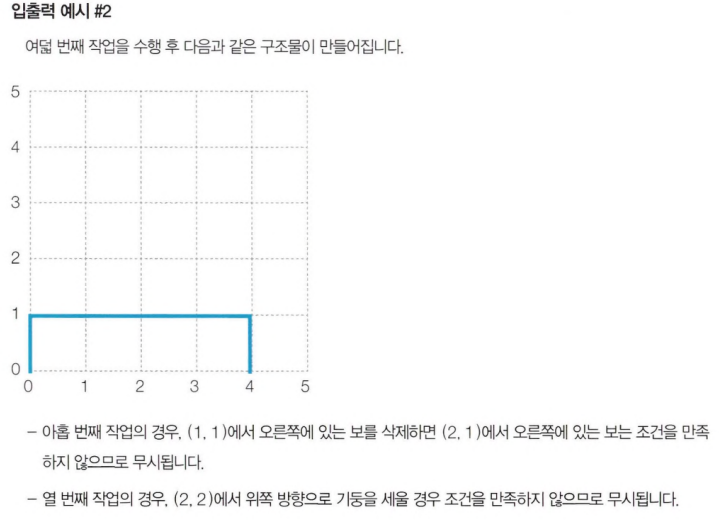

In [1]:
def possible(answer) :
    for x, y, stuff in answer :
        if stuff == 0 : # 기둥
            if y == 0 or [x-1, y, 1] in answer or [x, y, 1] in answer or [x, y-1, 0] in answer :
                continue
            return False
        
        else : # 보
            if [x, y-1, 0] in answer or [x+1, y-1, 0] in answer or ([x-1, y, 1] in answer and [x+1, y, 1] in answer) :
                continue
            return False
        
    return True


def solution(n, build_frame) :
    answer = []
    for frame in build_frame :
        x, y, stuff, operate = frame
        
        if operate == 0  : # 삭제
            if possible(answer) :
                answer.remove([x, y, stuff])
        
        else : # 설치
            if possible(answer) :
                answer.append([x, y, stuff])
                
    return sorted(answer)

In [5]:
n = int(input())
build_frame = [] # x, y, a, b 
# x, y : 기둥, 보를 설치 또는 삭제할 교차점 좌표 
# a : 설치 또는 삭제할 구조물 종류(0은 기둥, 1은 보)
# b : 0은 삭제, 1은 설치
for _ in range(int(input())) :
    build_frame.append(list(map(int, input().split())))

5
8
1 0 0 1
1 1 1 1
2 1 0 1
2 2 1 1
5 0 0 1
5 1 0 1
4 2 1 1
3 2 1 1


In [7]:
solution(n, build_frame)

[[1, 0, 0],
 [1, 1, 1],
 [2, 1, 0],
 [2, 2, 1],
 [3, 2, 1],
 [4, 2, 1],
 [5, 0, 0],
 [5, 1, 0]]

In [1]:
# 두 번째 풀이

# 현재까지의 결과 구조물을 모두 설치할 수 있는지 확인
def possible(result) :
    for structure in result :
        x, y, a = structure # x, y는 교차점의 좌표, a는 구조물 종류
        
        # 설치 구조물이 기둥이라면
        if a == 0:
            # 구조물을 설치할 수 있는지 (바닥 위에 있거나, 보의 한쪽 끝 위에 있거나, 다른 기둥의 위일 경우)
            if y == 0 or [x-1, y, 1] in result or [x, y, 1] in result or [x, y-1, 0] in result :
                continue
            # 설치할 수 없다면
            else :
                return False
        
        # 설치된 구조물이 보라면
        else :
            # 보의 한쪽 끝 부분이 기둥 위에 있거나, 양쪽 끝부분이 다른 보와 동시에 연결되어 있을 경우
            if [x, y-1, 0] in result or [x+1, y-1, 0] in result or ([x-1, y, 1] in result and [x+1, y, 1] in result) :
                continue
            else :
                return False
            
    return True


def solution(n, build_frame) :
    result = []
    
    for command in build_frame :
        x, y, a, b = command
        
        # 설치라면
        if b == 1 :
            result.append([x, y, a])
            if possible(result) :
                continue
            else :
                result.remove([x, y, a])
        # 삭제라면
        else :
            result.remove([x, y, a])
            if possible(result) :
                continue
            else :
                result.append([x, y, a])
                
    return sorted(result)

In [2]:
n = int(input())
build_frame = [] # x, y, a, b 
# x, y : 기둥, 보를 설치 또는 삭제할 교차점 좌표 
# a : 설치 또는 삭제할 구조물 종류(0은 기둥, 1은 보)
# b : 0은 삭제, 1은 설치
for _ in range(int(input())) :
    build_frame.append(list(map(int, input().split())))

5
10
0 0 0 1
2 0 0 1
4 0 0 1
0 1 1 1
1 1 1 1
2 1 1 1
3 1 1 1
2 0 0 0
1 1 1 0
2 2 0 1


In [3]:
solution(n, build_frame)

[[0, 0, 0], [0, 1, 1], [1, 1, 1], [2, 1, 1], [3, 1, 1], [4, 0, 0]]